In [56]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import re
import string
from string import punctuation
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split





In [4]:
df_test = pd.read_csv("/Users/sonali/Desktop/drugsComTest_raw.csv")
df_train = pd.read_csv("/Users/sonali/Desktop/drugsComTrain_raw.csv")

print ("The shape of the train set given is : ", df_train.shape)
print ("The shape of the test set given is : ", df_test.shape)

df_train.head()



The shape of the train set given is :  (161297, 7)
The shape of the test set given is :  (53766, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,03-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
df_test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,05-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [6]:

data=pd.concat([df_train,df_test])
data.shape

(215063, 7)

In [7]:
data.sample(100)

,uniqueID,drugName,condition,review,rating,date,usefulCount
109988,222520,Kyleena,Birth Control,"""INSERTION: Personally, the insertion was not ...",9,09-Jun-17,3
115357,60535,Ultravate,Eczema,"""This ointment was the only thing that worked ...",10,11-Apr-08,27
134524,86724,Zioptan,Glaucoma/Intraocular Hypertension,"""The pressure in my left eye was 28, right eye...",9,16-Jun-13,10
155903,102622,Aripiprazole,Bipolar Disorde,"""I was VERY hesitant on taking this medication...",9,16-Jul-15,31
11492,5471,Sovaldi,Hepatitis C,"""I received this treatment and as far as I co...",10,12-Dec-16,4
...,...,...,...,...,...,...,...
33913,68424,Nalbuphine,Pain,"""I was admitted to the hospital with a severe ...",1,28-Dec-09,16
43920,166678,Levonorgestrel,Birth Control,"""This is absolutely the WORST decision I&#039;...",3,20-Aug-16,3
49632,78069,Zyprexa,Bipolar Disorde,"""I had been so unwell off meds for over a year...",10,06-Dec-16,17
23204,123575,Skyla,Birth Control,"""Got my IUD on February 21. Not gonna lie, pro...",10,25-Apr-17,2


In [8]:


data.describe


<bound method NDFrame.describe of        uniqueID                  drugName                     condition  \
0        206461                 Valsartan  Left Ventricular Dysfunction   
1         95260                Guanfacine                          ADHD   
2         92703                    Lybrel                 Birth Control   
3        138000                Ortho Evra                 Birth Control   
4         35696  Buprenorphine / naloxone             Opiate Dependence   
...         ...                       ...                           ...   
53761    159999                 Tamoxifen     Breast Cancer, Prevention   
53762    140714              Escitalopram                       Anxiety   
53763    130945            Levonorgestrel                 Birth Control   
53764     47656                Tapentadol                          Pain   
53765    113712                 Arthrotec                      Sciatica   

                                                  review  rating 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [10]:
data.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [11]:

from wordcloud import WordCloud, STOPWORDS

In [12]:
#Null Value
print ("Null values in the dataset : ", data.isnull().sum(axis = 0))

Null values in the dataset :  uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64


In [13]:
# Calculating what percentage of data is null
size = data.shape[0]

print ("Total Size of the dataset : ", size)

total_na = data.isnull().sum(axis = 0)['condition']
print ("Null values : ", total_na)

print ("PERCENTAGE : ", (total_na/size)*100)

Total Size of the dataset :  215063
Null values :  1194
PERCENTAGE :  0.5551861547546533


In [14]:
data = data.dropna(how = 'any', axis = 0)

print ("The shape of the dataset after null values removal :", data.shape)

The shape of the dataset after null values removal : (213869, 7)


In [15]:
data.columns = data.columns.str.lower()

In [16]:
data.sort_values(['uniqueid'], ascending = True, inplace = True)
data.reset_index(drop = True, inplace = True)
data.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,28-Oct-15,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,27-Oct-15,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,27-Oct-15,7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,26-Oct-15,12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,25-Oct-15,4
5,6,Medroxyprogesterone,Birth Control,"""This is a horrible shot!! I got my first shot...",1,24-Oct-15,3
6,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,22-Oct-15,6
7,8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Im 19 and have been having heavy and painful ...",5,21-Oct-15,2
8,9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m a 30 year old woman. I got the shot ...",2,21-Oct-15,5
9,10,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 17 years old and I got shot in Augus...",7,20-Oct-15,2


In [17]:
print (data['condition'].nunique(), "\n")



916 



In [18]:



print ("some of the conditions are : ", data['condition'].unique()[0:10])

some of the conditions are :  ['Abnormal Uterine Bleeding' 'Amenorrhea' 'Birth Control' 'Endometriosis'
 'Endometrial Hyperplasia, Prophylaxis' 'Renal Cell Carcinoma'
 'Not Listed / Othe' 'Eye Redness' 'Benign Prostatic Hyperplasia' 'Acne']


In [19]:
data.loc[data['rating'] == 1, :]['drugname'].value_counts().head(10)

Miconazole                            767
Ethinyl estradiol / norethindrone     728
Etonogestrel                          707
Levonorgestrel                        511
Nexplanon                             504
Ethinyl estradiol / norgestimate      464
Medroxyprogesterone                   443
Depo-Provera                          417
Tioconazole                           410
Ethinyl estradiol / levonorgestrel    385
Name: drugname, dtype: int64

In [20]:



data.loc[data.usefulcount == 0, 'drugname'].value_counts()


Etonogestrel                         590
Levonorgestrel                       473
Ethinyl estradiol / norethindrone    371
Implanon                             327
Ethinyl estradiol / norgestimate     252
                                    ... 
Transderm-Scop                         1
Glimepiride / pioglitazone             1
Estazolam                              1
Vusion                                 1
Menthol                                1
Name: drugname, Length: 1487, dtype: int64

In [22]:
data['rating'].min()




1

In [23]:
data['date'] = pd.to_datetime(data['date'])

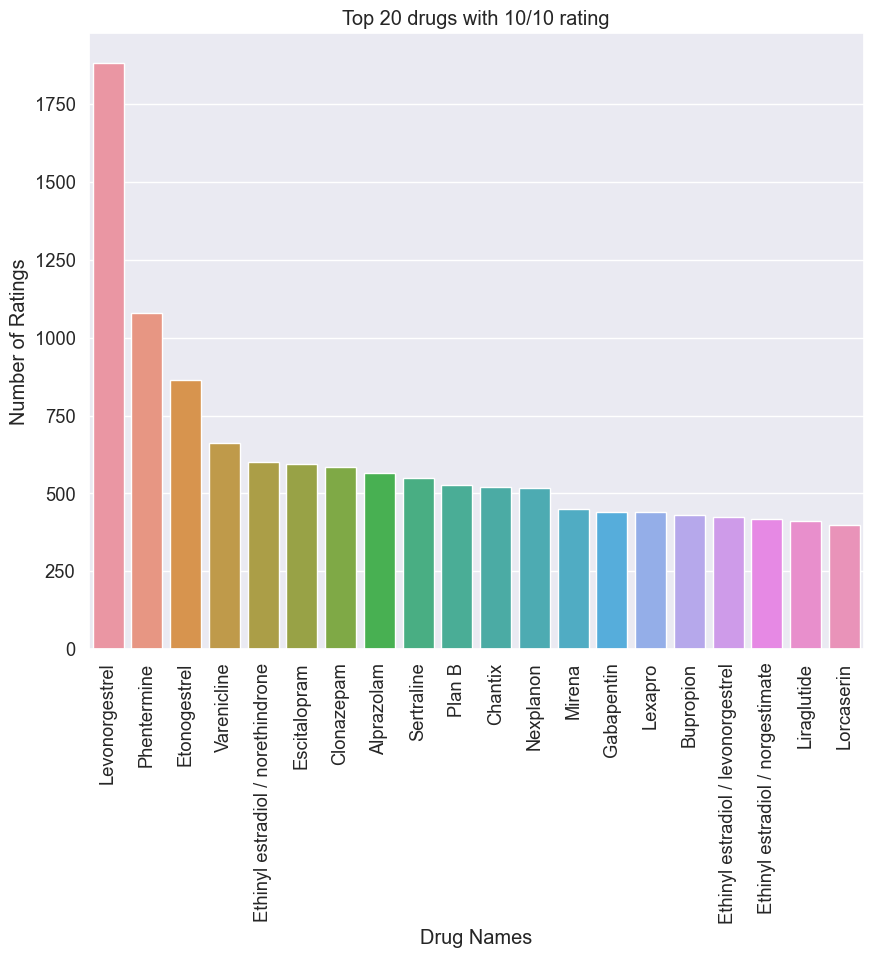

In [22]:

#This barplot shows the top 20 drugs with the 10/10 rating
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [10, 8]

rating = dict(data.loc[data.rating == 10, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set(title = 'Top 20 drugs with 10/10 rating', ylabel = 'Number of Ratings', xlabel = "Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);


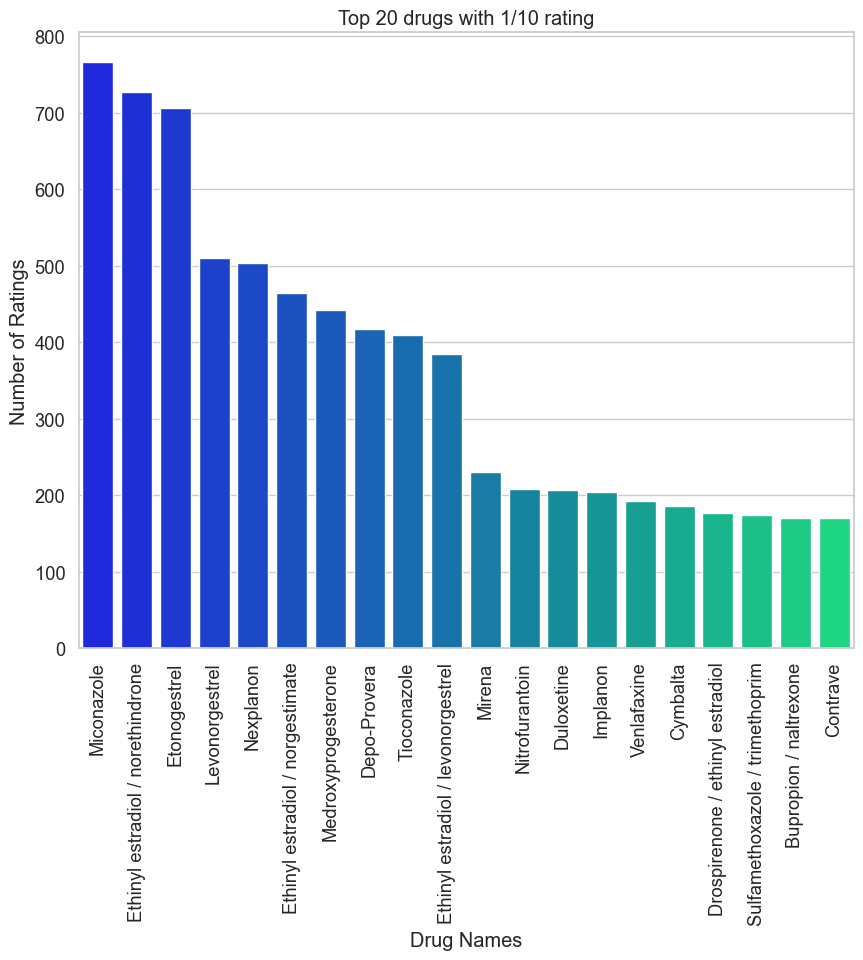

In [24]:
sns.set(font_scale = 1.2, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [10, 8]

rating = dict(data.loc[data.rating == 1, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set(title = 'Top 20 drugs with 1/10 rating', ylabel = 'Number of Ratings', xlabel = "Drug Names")

plt.setp(sns_rating.get_xticklabels(), rotation=90);

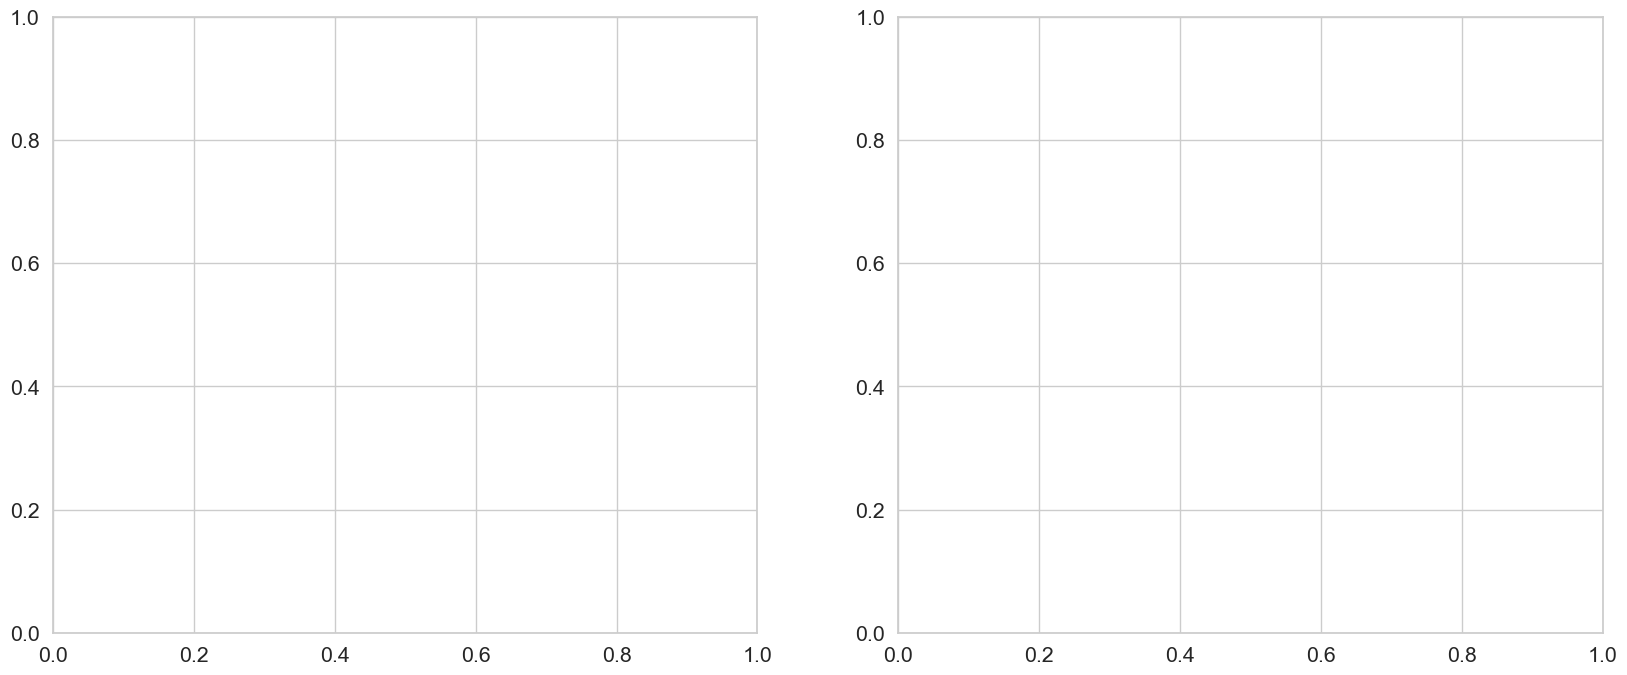

In [25]:

# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)


In [28]:
sns_2 = sns.distplot(data['rating'], ax = ax[1])
sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating");

In [31]:
sns_1 = sns.countplot(data['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

ValueError: Input data must be a pandas object to reorder

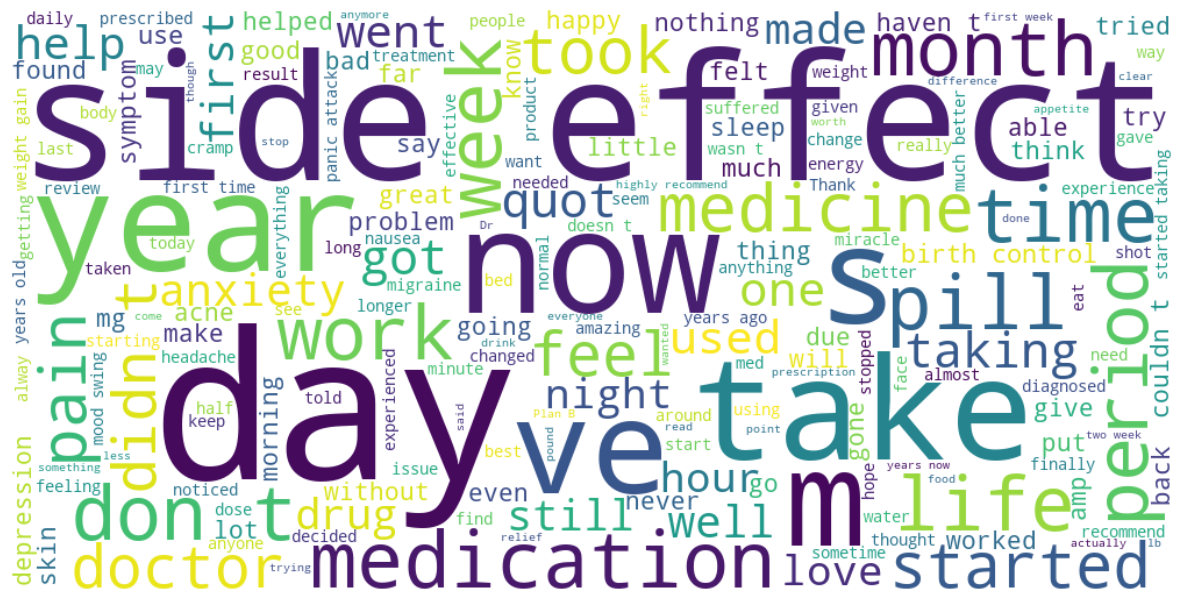

In [35]:
# Word cloud of the reviews with rating equal to 10

df_rate_ten = data.loc[data.rating == 10, 'review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

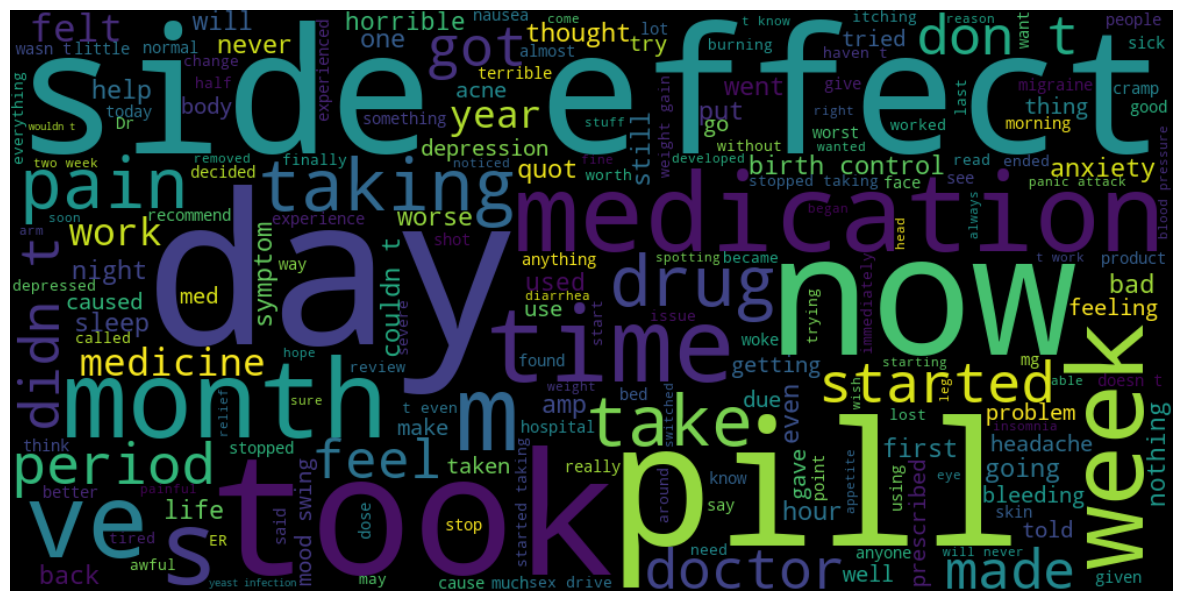

In [37]:
# Word cloud of the reviews with rating equal to 1

df_rate_one = data.loc[data.rating == 1, 'review']
k1 = (' '.join(df_rate_one))

wordcloud = WordCloud(width = 1000, height = 500).generate(k1)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

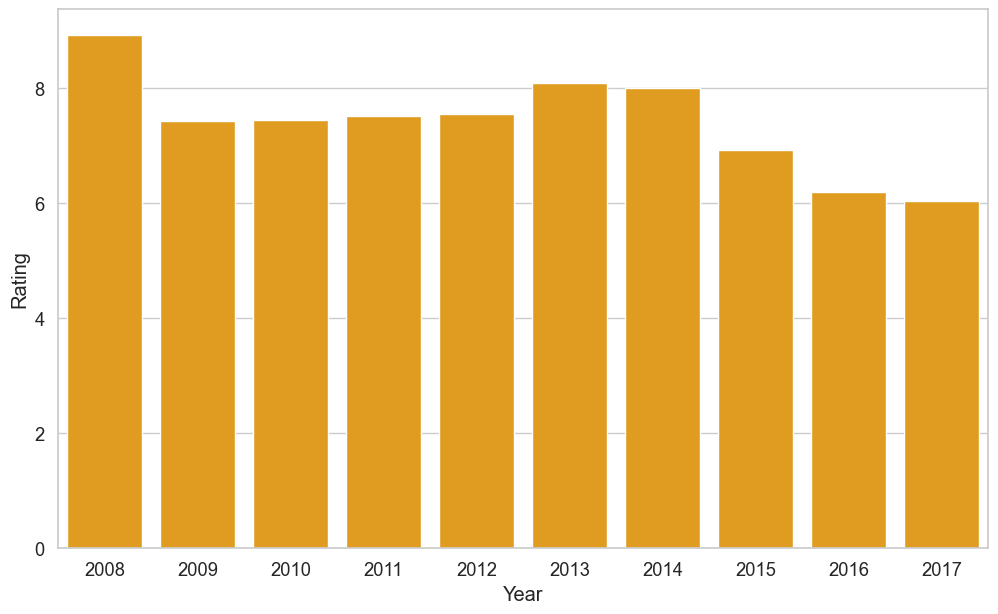

In [39]:
# This barplot shows the mean rating of the drugs per year

mean_rating = dict(data.groupby(data['date'].dt.year)['rating'].mean())
plt.rcParams['figure.figsize'] = [12, 7]
sns.set(font_scale = 1.2, style = 'whitegrid')
sns_ = sns.barplot(x = list(mean_rating.keys()), y = list(mean_rating.values()), color = 'orange');
sns_.set_xlabel("Year")
sns_.set_ylabel("Rating");

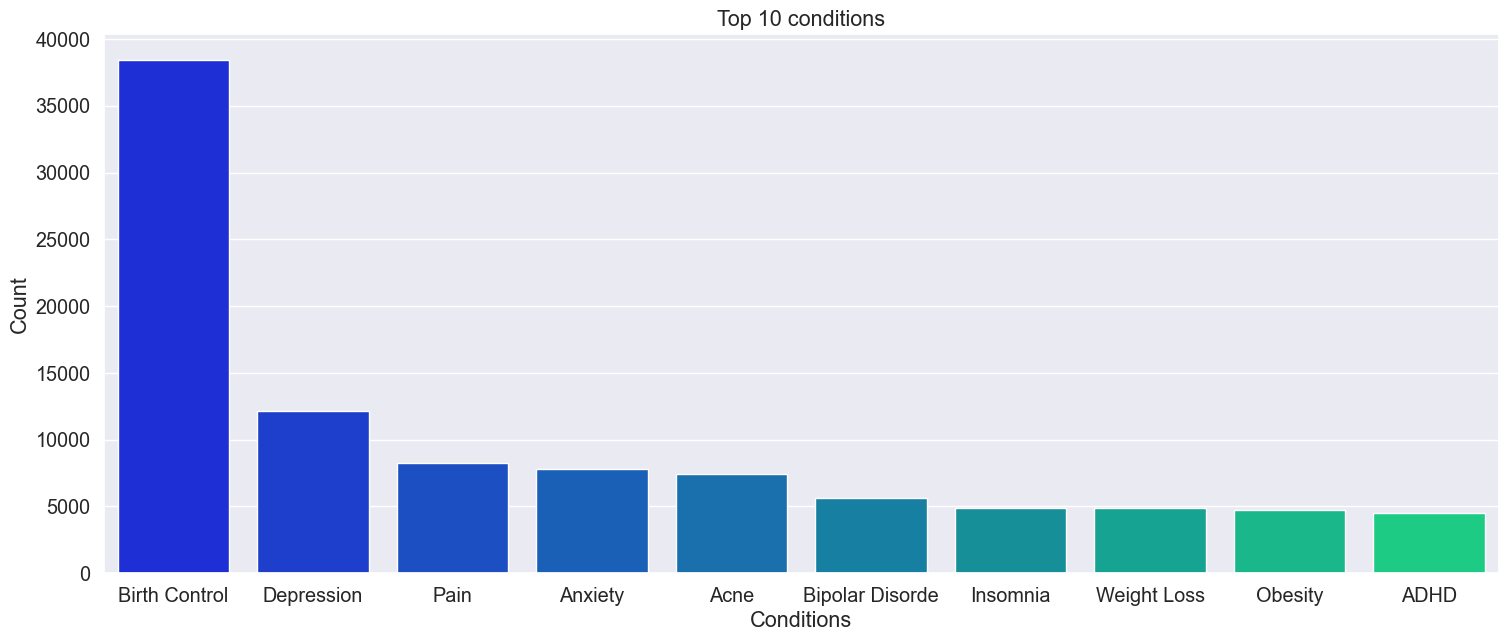

In [40]:
# This barplot show the top 10 conditions the people are suffering.

cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

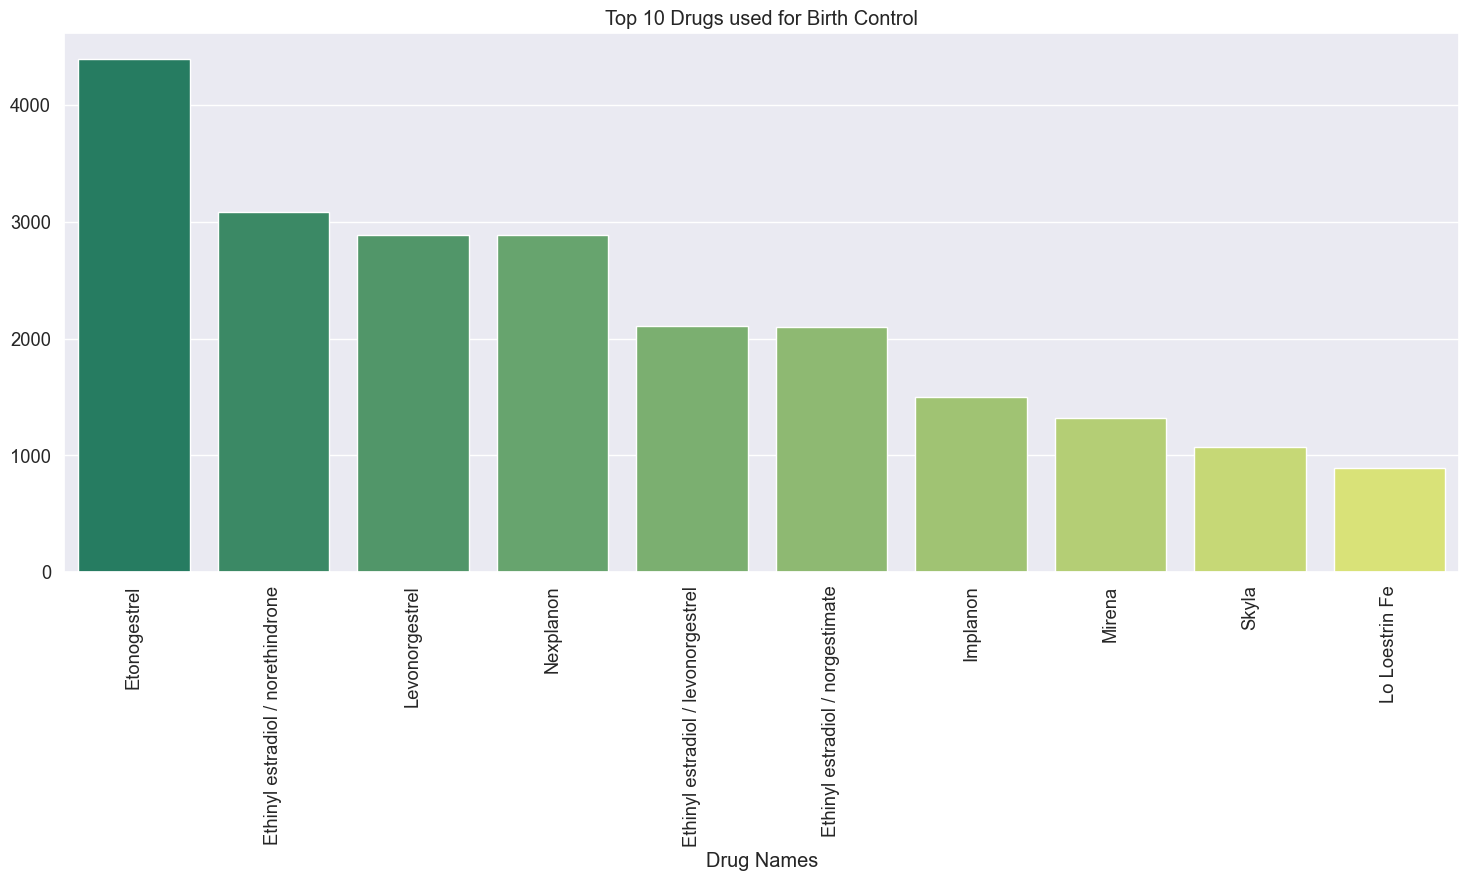

In [41]:
# Top 10 drugs which are used for the top condition, that is Birth Control

df = data[data['condition'] == 'Birth Control']['drugname'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df.index, y = df.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

<Axes: xlabel='usefulcount', ylabel='Density'>

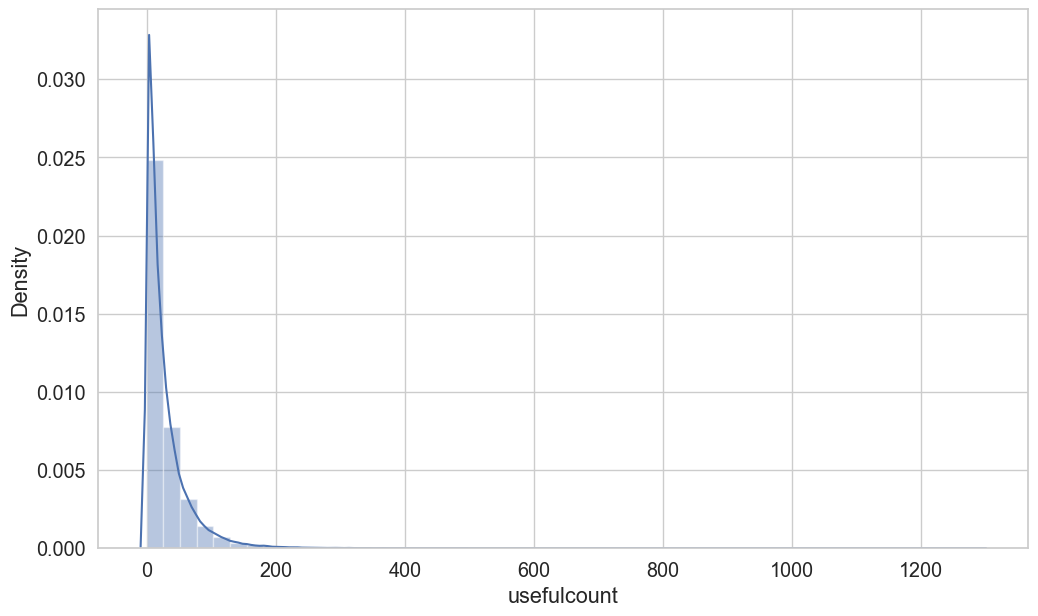

In [43]:
# Distribution of the useful count
sns.set(style = 'whitegrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [12, 7]
sns.distplot(data['usefulcount'].dropna())

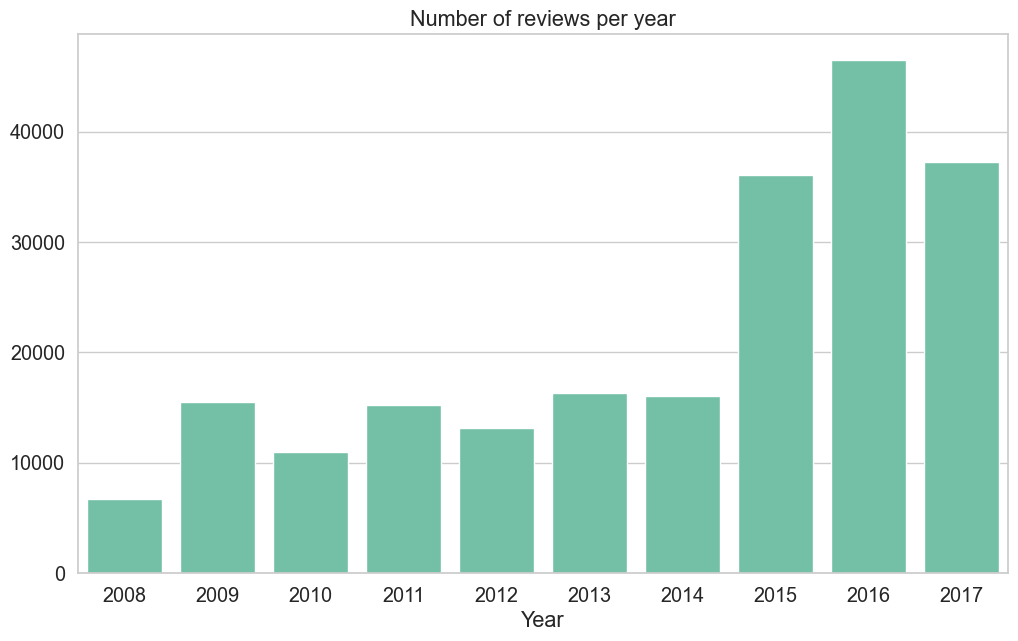

In [44]:
# This barplot shows the number of reviews per year
df = data['date'].dt.year.value_counts()
df = df.sort_index()

sns_ = sns.barplot(x = df.index, y = df.values, color = 'mediumaquamarine')
sns_.set_title("Number of reviews per year")
sns_.set_xlabel("Year");

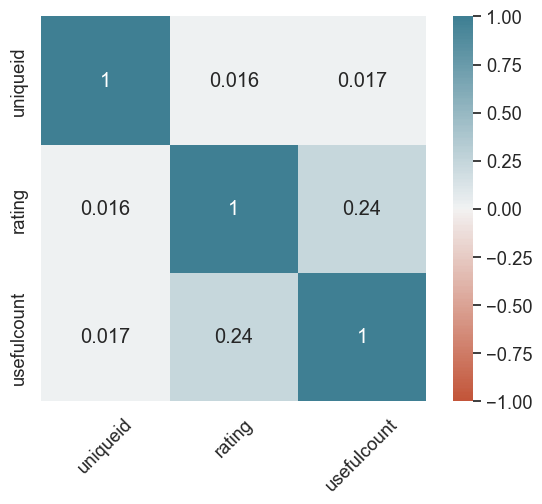

In [46]:
# Heatmap of the correlation matrix
plt.rcParams['figure.figsize'] = [7,5]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_heat = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200), square=True);
plt.setp(sns_heat.get_xticklabels(), rotation = 45);